In [1]:
import itertools
import datasets
import model_v1
import model_v2
import PIL
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import torch
import torchvision
import pytorch_lightning as pl

In [2]:
reload(datasets), reload(model2)

(<module 'datasets' from '/home/negin/thesis/Video-Matting-pipeline/datasets.py'>,
 <module 'model2' from '/home/negin/thesis/Video-Matting-pipeline/model2.py'>)

In [3]:
trainconf = datasets.DataConfig(
    video_matting_root='/home/shared/data/',
    mode='train',
    window_size=2,
)
train_ds = datasets.FrameDataset(trainconf)

In [4]:
validconf = datasets.DataConfig(
    video_matting_root='/home/shared/data/',
    mode='valid',
    window_size=2,
)
valid_ds = datasets.FrameDataset(validconf)

In [5]:
testconf = datasets.DataConfig(
    video_matting_root='/home/shared/data/',
    mode='test',
    window_size=2,
)
test_ds = datasets.FrameDataset(testconf)

In [6]:
sample = train_ds[0]
img = sample['input']
img.shape

torch.Size([7, 480, 640])

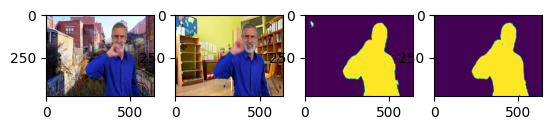

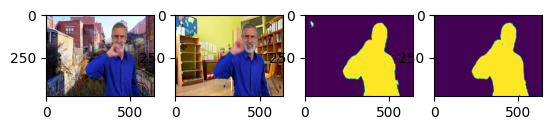

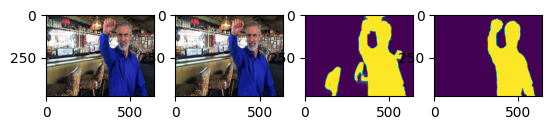

In [7]:
sample = train_ds[4]
inputs  = sample["input"]
gt = sample["output"]
plt.subplot(1,4,1)
plt.imshow((inputs[0:3].permute(1, 2, 0)))
plt.subplot(1,4,2)
plt.imshow((inputs[3:6].permute(1, 2, 0)))
plt.subplot(1,4,3)
plt.imshow(inputs[6])
plt.subplot(1,4,4)
plt.imshow(gt.permute(1, 2, 0))
plt.show()

sample = valid_ds[4]
inputs  = sample["input"]
gt = sample["output"]
plt.subplot(1,4,1)
plt.imshow((inputs[0:3].permute(1, 2, 0)))
plt.subplot(1,4,2)
plt.imshow((inputs[3:6].permute(1, 2, 0)))
plt.subplot(1,4,3)
plt.imshow(inputs[6])
plt.subplot(1,4,4)
plt.imshow(gt.permute(1, 2, 0))
plt.show()


sample = test_ds[4]
inputs  = sample["input"]
gt = sample["output"]
plt.subplot(1,4,1)
plt.imshow((inputs[0:3].permute(1, 2, 0)))
plt.subplot(1,4,2)
plt.imshow((inputs[3:6].permute(1, 2, 0)))
plt.subplot(1,4,3)
plt.imshow(inputs[6])
plt.subplot(1,4,4)
plt.imshow(gt.permute(1, 2, 0))
plt.show()


In [8]:
# pl.imshow(x[0:3].permute(1, 2, 0))
# pl.imshow(x[3:6].permute(1, 2, 0))
# pl.imshow(x[6])
# pl.imshow((y).permute(1,2,0))

In [9]:
# pixel_values = np.array(y)

# # Determine the unique values in the image
# unique_values = np.unique(pixel_values)

# # Check the value range
# if len(unique_values) == 2 and np.array_equal(unique_values, [0, 1]):
#     print("The image is binary (0 and 1).")
# elif np.min(unique_values) >= 0 and np.max(unique_values) <= 1:
#     print("The image has values ranging from 0 to 1.")
# else:
#     print("The image has a different value range.")

In [10]:
dataloader = datasets.data_loader(train_ds, valid_ds, test_ds, batch_size=8, shuffle=True)

In [11]:
dataloader

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f59047784c0>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7f5904778b20>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f5904778b80>}

In [12]:
train_dataloader, valid_dataloader, test_dataloader = dataloader['train'], dataloader['valid'], dataloader['test']

In [13]:
model = model2.PetModel("FPN", "resnet34", in_channels=7, out_classes=1)

In [ ]:
trainer = pl.Trainer( 
    max_epochs=5,
)

trainer.fit(
    model, 
    train_dataloaders=train_dataloader, 
    val_dataloaders=valid_dataloader,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type     | Params
-------------------------------------
0 | model   | FPN      | 23.2 M
1 | loss_fn | DiceLoss | 0     
-------------------------------------
23.2 M    Trainable params
0         Non-trainable params
23.2 M    Total params
92.672    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/opt/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]